In [2]:
import sys
sys.path.append("..")  # <-  This should point to the root directory of the project relative to this file

from custom_scripts import database
from custom_scripts import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
sample_number = 1000
flights_query =  f"""
                SELECT * FROM flights ORDER BY RANDOM() LIMIT '{sample_number}';
                """

flights = database.query(flights_query)
flights.head()

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,no_name
0,2019-08-16,AS,AS,AS,1111,AS,N839VA,1111,14747,SEA,...,1180.0,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,None
1,2018-02-24,UA,UA,UA,1871,UA,N211UA,1871,11618,EWR,...,2454.0,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,None
2,2019-03-30,AA,AA_CODESHARE,AA,5953,YV,N951LR,5953,11298,DFW,...,1022.0,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,None
3,2018-01-30,UA,UA_CODESHARE,UA,3551,YX,N631RW,3551,13198,MCI,...,403.0,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,None
4,2018-11-26,WN,WN,WN,5543,WN,N290WN,5543,10800,BUR,...,223.0,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,None


In [3]:
flights.columns

Index(['fl_date', 'mkt_unique_carrier', 'branded_code_share', 'mkt_carrier',
       'mkt_carrier_fl_num', 'op_unique_carrier', 'tail_num',
       'op_carrier_fl_num', 'origin_airport_id', 'origin', 'origin_city_name',
       'dest_airport_id', 'dest', 'dest_city_name', 'crs_dep_time', 'dep_time',
       'dep_delay', 'taxi_out', 'wheels_off', 'wheels_on', 'taxi_in',
       'crs_arr_time', 'arr_time', 'arr_delay', 'cancelled',
       'cancellation_code', 'diverted', 'dup', 'crs_elapsed_time',
       'actual_elapsed_time', 'air_time', 'flights', 'distance',
       'carrier_delay', 'weather_delay', 'nas_delay', 'security_delay',
       'late_aircraft_delay', 'first_dep_time', 'total_add_gtime',
       'longest_add_gtime', 'no_name'],
      dtype='object')

In [14]:
Delays = flights[['dep_delay', 'air_time', 'crs_elapsed_time']]
Delays.head()

,dep_delay,air_time,crs_elapsed_time
0,-7.0,142.0,180.0
1,0.0,338.0,364.0
2,-11.0,147.0,169.0
3,-15.0,66.0,99.0
4,11.0,46.0,65.0


In [15]:
Delays = Delays.dropna(0) #Here the variables type are not the same so, I have just drop nans because nan delay has a meaning but nan air_time doesn't

In [16]:
Delays = Delays.assign(flight_time_change = Delays.air_time - Delays.crs_elapsed_time)

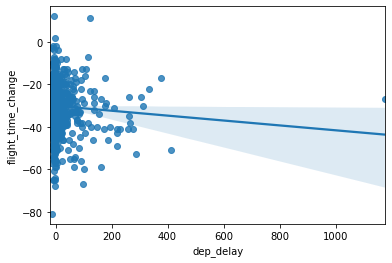

In [18]:
sns.regplot(x="dep_delay", y="flight_time_change", data=Delays)
plt.show()

In [13]:
# There is an slight correlation but it is not very conclusive to me so I didn't continue with the hypothesis testing